<a href="https://colab.research.google.com/github/molecools/molecular-docking/blob/main/geneseq_biopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
!pip install biopython
import Bio
from Bio import SeqIO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.2 MB/s eta 0:00:00


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/promoters.data.txt", sep='\t', header=None)

In [5]:
df


,0,1,2
0,"+,S10,",NaN,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,"+,AMPC,",NaN,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,"+,AROH,",NaN,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,"+,DEOP2,",aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...,NaN
4,"+,LEU1_TRNA,",tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...,NaN
...,...,...,...
101,"-, 799,",NaN,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaagg...
102,"-, 987,",NaN,gtattctcaacaagattaaccgacagattcaatctcgtggatggac...
103,"-,1226,",NaN,cgcgactacgatgagatgcctgagtgcttccgttactggattgtca...
104,"-, 794,",NaN,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgctg...


In [6]:
# Assign column names
df.columns = ['gene_code', 'sequence_1', 'sequence_2']

# Display the first few rows of the dataset
print(df.head())

      gene_code                                         sequence_1  \
0        +,S10,                                                NaN   
1       +,AMPC,                                                NaN   
2       +,AROH,                                                NaN   
3      +,DEOP2,  aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...   
4  +,LEU1_TRNA,  tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...   

                                          sequence_2  
0  tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...  
1  tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...  
2  gtactagagaactagtgcattagcttatttttttgttatcatgcta...  
3                                                NaN  
4                                                NaN  


In [7]:
# Fill NaN values in sequence columns with "Z"
df['sequence_1'] = df['sequence_1'].fillna('Z')
df['sequence_2'] = df['sequence_2'].fillna('Z')



In [8]:
df

,gene_code,sequence_1,sequence_2
0,"+,S10,",Z,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,"+,AMPC,",Z,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,"+,AROH,",Z,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,"+,DEOP2,",aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...,Z
4,"+,LEU1_TRNA,",tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...,Z
...,...,...,...
101,"-, 799,",Z,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaagg...
102,"-, 987,",Z,gtattctcaacaagattaaccgacagattcaatctcgtggatggac...
103,"-,1226,",Z,cgcgactacgatgagatgcctgagtgcttccgttactggattgtca...
104,"-, 794,",Z,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgctg...


In [9]:
# Ensure sequences are strings
df['sequence_1'] = df['sequence_1'].astype(str)
df['sequence_2'] = df['sequence_2'].astype(str)

In [10]:
from Bio.Seq import Seq  # Import the Seq class from Biopython

# Define function to calculate GC content
def calculate_gc_content(sequence):
    seq = Seq(sequence)
    gc_content = (seq.count("G") + seq.count("C")) / len(seq) * 100
    return round(gc_content, 2)  # Round to 2 decimal places

In [11]:
# Calculate GC content for both sequence columns
df['GC_content_1'] = df['sequence_1'].apply(calculate_gc_content)
df['GC_content_2'] = df['sequence_2'].apply(calculate_gc_content)

In [12]:
# Calculate sequence lengths
df['length_1'] = df['sequence_1'].apply(len)
df['length_2'] = df['sequence_2'].apply(len)

In [13]:
# Display the final DataFrame
print("\nFinal DataFrame with GC Content and Lengths:")
print(df.head())


Final DataFrame with GC Content and Lengths:
      gene_code                                         sequence_1  \
0        +,S10,                                                  Z   
1       +,AMPC,                                                  Z   
2       +,AROH,                                                  Z   
3      +,DEOP2,  aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...   
4  +,LEU1_TRNA,  tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...   

                                          sequence_2  GC_content_1  \
0  tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...           0.0   
1  tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...           0.0   
2  gtactagagaactagtgcattagcttatttttttgttatcatgcta...           0.0   
3                                                  Z           0.0   
4                                                  Z           0.0   

   GC_content_2  length_1  length_2  
0           0.0         1        57  
1           0.0         1        57 

In [14]:
df

,gene_code,sequence_1,sequence_2,GC_content_1,GC_content_2,length_1,length_2
0,"+,S10,",Z,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...,0.0,0.0,1,57
1,"+,AMPC,",Z,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...,0.0,0.0,1,57
2,"+,AROH,",Z,gtactagagaactagtgcattagcttatttttttgttatcatgcta...,0.0,0.0,1,57
3,"+,DEOP2,",aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...,Z,0.0,0.0,57,1
4,"+,LEU1_TRNA,",tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...,Z,0.0,0.0,57,1
...,...,...,...,...,...,...,...
101,"-, 799,",Z,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaagg...,0.0,0.0,1,57
102,"-, 987,",Z,gtattctcaacaagattaaccgacagattcaatctcgtggatggac...,0.0,0.0,1,57
103,"-,1226,",Z,cgcgactacgatgagatgcctgagtgcttccgttactggattgtca...,0.0,0.0,1,57
104,"-, 794,",Z,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgctg...,0.0,0.0,1,57


In [15]:
# Ensure sequences are strings and convert to uppercase
df['sequence_1'] = df['sequence_1'].astype(str).str.upper()
df['sequence_2'] = df['sequence_2'].astype(str).str.upper()

In [16]:
df

,gene_code,sequence_1,sequence_2,GC_content_1,GC_content_2,length_1,length_2
0,"+,S10,",Z,TACTAGCAATACGCTTGCGTTCGGTGGTTAAGTATGTATAATGCGC...,0.0,0.0,1,57
1,"+,AMPC,",Z,TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...,0.0,0.0,1,57
2,"+,AROH,",Z,GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...,0.0,0.0,1,57
3,"+,DEOP2,",AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...,Z,0.0,0.0,57,1
4,"+,LEU1_TRNA,",TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...,Z,0.0,0.0,57,1
...,...,...,...,...,...,...,...
101,"-, 799,",Z,CCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTGAAAGG...,0.0,0.0,1,57
102,"-, 987,",Z,GTATTCTCAACAAGATTAACCGACAGATTCAATCTCGTGGATGGAC...,0.0,0.0,1,57
103,"-,1226,",Z,CGCGACTACGATGAGATGCCTGAGTGCTTCCGTTACTGGATTGTCA...,0.0,0.0,1,57
104,"-, 794,",Z,CTCGTCCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTG...,0.0,0.0,1,57


In [17]:
# Define function to calculate GC content
def calculate_gc_content(sequence):
    # Filter out invalid characters (e.g., "Z") and calculate GC content
    valid_seq = ''.join([c for c in sequence if c in 'ACGT'])
    if not valid_seq:  # If no valid characters, return 0
        return 0.0
    seq = Seq(valid_seq)
    gc_content = (seq.count("G") + seq.count("C")) / len(seq) * 100
    return round(gc_content, 2)  # Round to 2 decimal places

In [18]:
# Calculate GC content for both sequence columns
df['GC_content_1'] = df['sequence_1'].apply(calculate_gc_content)
df['GC_content_2'] = df['sequence_2'].apply(calculate_gc_content)

# Calculate sequence lengths
df['length_1'] = df['sequence_1'].apply(len)

In [19]:
df

,gene_code,sequence_1,sequence_2,GC_content_1,GC_content_2,length_1,length_2
0,"+,S10,",Z,TACTAGCAATACGCTTGCGTTCGGTGGTTAAGTATGTATAATGCGC...,0.00,47.37,1,57
1,"+,AMPC,",Z,TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...,0.00,47.37,1,57
2,"+,AROH,",Z,GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...,0.00,40.35,1,57
3,"+,DEOP2,",AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...,Z,36.84,0.00,57,1
4,"+,LEU1_TRNA,",TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...,Z,42.11,0.00,57,1
...,...,...,...,...,...,...,...
101,"-, 799,",Z,CCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTGAAAGG...,0.00,45.61,1,57
102,"-, 987,",Z,GTATTCTCAACAAGATTAACCGACAGATTCAATCTCGTGGATGGAC...,0.00,40.35,1,57
103,"-,1226,",Z,CGCGACTACGATGAGATGCCTGAGTGCTTCCGTTACTGGATTGTCA...,0.00,54.39,1,57
104,"-, 794,",Z,CTCGTCCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTG...,0.00,50.88,1,57


In [20]:
df['length_2'] = df['sequence_2'].apply(len)

# Display the final DataFrame
print("\nFinal DataFrame with GC Content and Lengths:")
print(df.head())


Final DataFrame with GC Content and Lengths:
      gene_code                                         sequence_1  \
0        +,S10,                                                  Z   
1       +,AMPC,                                                  Z   
2       +,AROH,                                                  Z   
3      +,DEOP2,  AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...   
4  +,LEU1_TRNA,  TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...   

                                          sequence_2  GC_content_1  \
0  TACTAGCAATACGCTTGCGTTCGGTGGTTAAGTATGTATAATGCGC...          0.00   
1  TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...          0.00   
2  GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...          0.00   
3                                                  Z         36.84   
4                                                  Z         42.11   

   GC_content_2  length_1  length_2  
0         47.37         1        57  
1         47.37         1        57 

In [21]:
df

,gene_code,sequence_1,sequence_2,GC_content_1,GC_content_2,length_1,length_2
0,"+,S10,",Z,TACTAGCAATACGCTTGCGTTCGGTGGTTAAGTATGTATAATGCGC...,0.00,47.37,1,57
1,"+,AMPC,",Z,TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...,0.00,47.37,1,57
2,"+,AROH,",Z,GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...,0.00,40.35,1,57
3,"+,DEOP2,",AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...,Z,36.84,0.00,57,1
4,"+,LEU1_TRNA,",TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...,Z,42.11,0.00,57,1
...,...,...,...,...,...,...,...
101,"-, 799,",Z,CCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTGAAAGG...,0.00,45.61,1,57
102,"-, 987,",Z,GTATTCTCAACAAGATTAACCGACAGATTCAATCTCGTGGATGGAC...,0.00,40.35,1,57
103,"-,1226,",Z,CGCGACTACGATGAGATGCCTGAGTGCTTCCGTTACTGGATTGTCA...,0.00,54.39,1,57
104,"-, 794,",Z,CTCGTCCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTG...,0.00,50.88,1,57


In [22]:
# Save the results
df.to_csv('analyzed_promoters.csv', index=False)

In [23]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

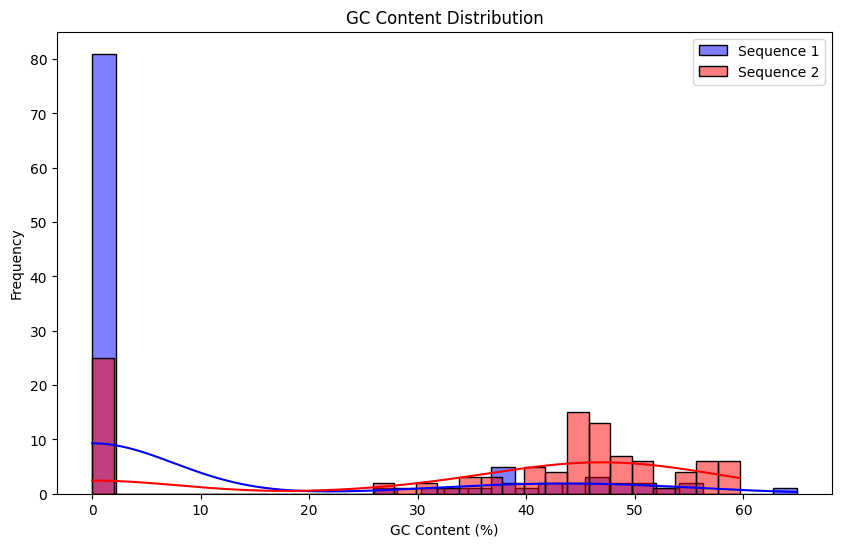

In [24]:
# Visualization
# Plot GC content distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['GC_content_1'], bins=30, kde=True, color='blue', label='Sequence 1')
sns.histplot(df['GC_content_2'], bins=30, kde=True, color='red', label='Sequence 2')
plt.title('GC Content Distribution')
plt.xlabel('GC Content (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

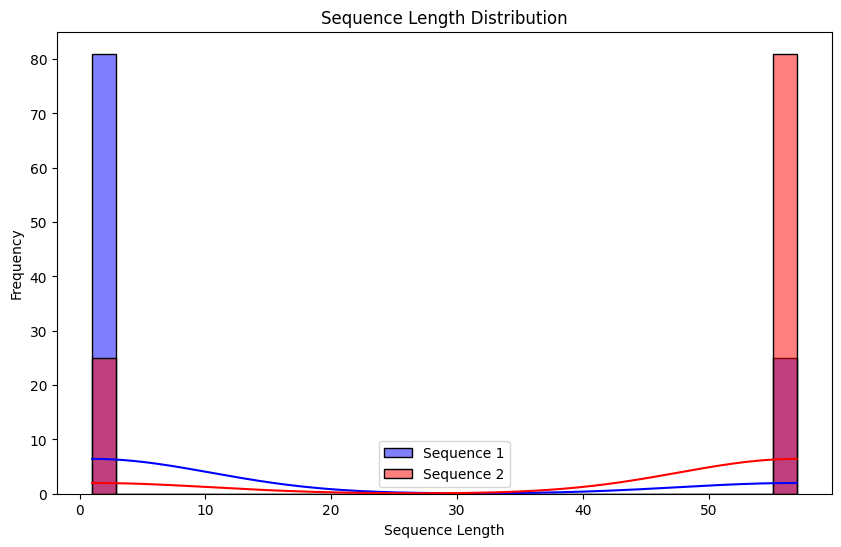

In [25]:
# Plot sequence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['length_1'], bins=30, kde=True, color='blue', label='Sequence 1')
sns.histplot(df['length_2'], bins=30, kde=True, color='red', label='Sequence 2')
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [26]:
# Machine Learning: Clustering based on GC content and sequence length
# Prepare features for clustering
features = df[['GC_content_1', 'GC_content_2', 'length_1', 'length_2']]

In [27]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [28]:
# Perform PCA for visualization (optional)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA_1'] = pca_result[:, 0]
df['PCA_2'] = pca_result[:, 1]

In [29]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

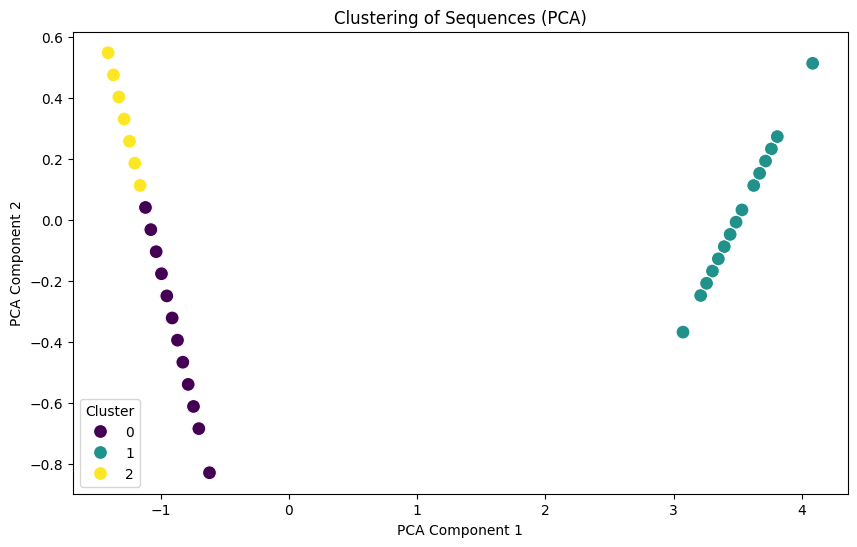

In [30]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clustering of Sequences (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [31]:
# Display cluster statistics
print("\nCluster Statistics:")
print(df.groupby('cluster')[['GC_content_1', 'GC_content_2', 'length_1', 'length_2']].mean())


Cluster Statistics:
         GC_content_1  GC_content_2  length_1  length_2
cluster                                                
0              0.0000     41.761569       1.0      57.0
1             43.7904      0.000000      57.0       1.0
2              0.0000     53.625667       1.0      57.0


Key Steps:
1. Visualization:
GC Content Distribution:

A histogram is plotted to show the distribution of GC content for both sequence_1 and sequence_2.

Sequence Length Distribution:

A histogram is plotted to show the distribution of sequence lengths for both sequence_1 and sequence_2.

2. Machine Learning:
Feature Preparation:

Features for clustering include GC_content_1, GC_content_2, length_1, and length_2.

Standardization:

Features are standardized using StandardScaler to ensure equal weighting.

PCA (Optional):

Principal Component Analysis (PCA) is performed to reduce the features to 2 dimensions for visualization.

KMeans Clustering:

KMeans clustering is applied to group sequences into clusters based on their GC content and length.

Cluster Visualization:

Clusters are visualized using a scatter plot of the first two PCA components.

Cluster Statistics:

Mean values of GC content and sequence length are calculated for each cluster.

In [32]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Select relevant features
X = df[['GC_content_1', 'GC_content_2', 'length_1', 'length_2']]

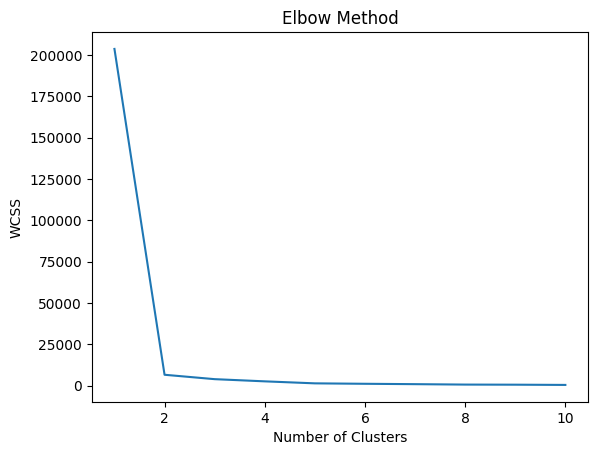

In [33]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

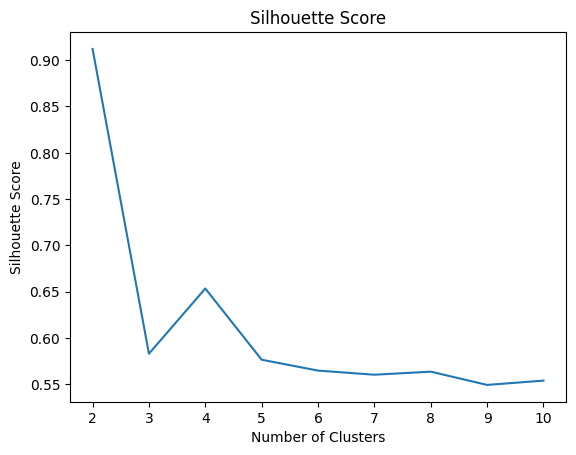

In [34]:
# Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [35]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [36]:
!pip install scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 86.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.6.3-cp311-cp311-linux_x86_64.whl size=7294510 sha256=1f9b9b47a358d5d0ec70efca869fcb6e39ef30a513d4e1d5c4435559d2f38b65
  Stored in directory: /root/.cache/pip/wheels/c9/11/a2/86492071506a487bcba7015b710a9e89d66ca69845512fb86c
  Created wheel for biom-format: filename=biom_format-2.1.16-cp311-cp311-linux_x86_64.whl size=12182980 sha256=fd7b2f7be497ff6ea24c6e4f401b591240de0d805c77682208cffc3e14c882d7
  Stored in directory: /root/.cache/pip/wheels/a5/6b/58/a879e8fbae2479a3d1a68719f3a062fe62701d6494f1b74f5e
Successf

In [37]:
import random

def replace_z_with_random_seq(sequence):
  """Replaces 'Z' characters in a sequence with a random sequence of 'ACGT'
  that is 10-15 characters long."""
  new_sequence = []
  for base in sequence:
    if base == 'Z':
      # Generate random sequence length between 20 and 25
      seq_len = random.randint(20, 25)
      # Generate random sequence of 'ACGT'
      random_seq = ''.join(random.choices('ACGT', k=seq_len))
      new_sequence.append(random_seq)
    else:
      new_sequence.append(base)
  return ''.join(new_sequence)

# Apply the function to your sequence columns
df['sequence_1'] = df['sequence_1'].apply(replace_z_with_random_seq)
df['sequence_2'] = df['sequence_2'].apply(replace_z_with_random_seq)

In [38]:
df

,gene_code,sequence_1,sequence_2,GC_content_1,GC_content_2,length_1,length_2,PCA_1,PCA_2,cluster
0,"+,S10,",TGAAATGCTATAGTTAGTTTGACT,TACTAGCAATACGCTTGCGTTCGGTGGTTAAGTATGTATAATGCGC...,0.00,47.37,1,57,-1.118637,0.040596,0
1,"+,AMPC,",GATTAGTGATACCCCAACTGA,TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...,0.00,47.37,1,57,-1.118637,0.040596,0
2,"+,AROH,",GATGCATCCAACGCCCTTTG,GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...,0.00,40.35,1,57,-0.952149,-0.249187,0
3,"+,DEOP2,",AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...,TACGGAAATGTGTCAGGAAGCCCG,36.84,0.00,57,1,3.348942,-0.127714,1
4,"+,LEU1_TRNA,",TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...,GAGCTTAGTGTCGAATTCTCAGGGC,42.11,0.00,57,1,3.487039,-0.007463,1
...,...,...,...,...,...,...,...,...,...,...
101,"-, 799,",AACCAGCGTGCGCAGAGGGCGT,CCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTGAAAGG...,0.00,45.61,1,57,-1.076896,-0.032056,0
102,"-, 987,",GAGTGTCAGTACGAGTTTAAC,GTATTCTCAACAAGATTAACCGACAGATTCAATCTCGTGGATGGAC...,0.00,40.35,1,57,-0.952149,-0.249187,0
103,"-,1226,",CGCCCGGCGTAAAAATACCGA,CGCGACTACGATGAGATGCCTGAGTGCTTCCGTTACTGGATTGTCA...,0.00,54.39,1,57,-1.285124,0.330378,2
104,"-, 794,",CGTCCTCCACCACGGCACAGT,CTCGTCCTCAATGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTG...,0.00,50.88,1,57,-1.201880,0.185487,2


In [39]:
from skbio import DNA

# Create a DNA object from your sequence data
seq = DNA(df['sequence_1'].iloc[0])

# Calculate the GC content of the sequence
gc_content = seq.gc_content
print(gc_content)

# Find the melting temperature of the sequence
#melting_temp = seq.melting_temp()
#print(melting_temp)

<bound method NucleotideMixin.gc_content of DNA
----------------------------
Stats:
    length: 24
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 29.17%
----------------------------
0 TGAAATGCTA TAGTTAGTTT GACT>


In [40]:
!pip install --upgrade scikit-bio

In [41]:
from Bio.SeqUtils import MeltingTemp

# Assuming 'sequence' is a string containing the DNA sequence
melting_temp = MeltingTemp.Tm_Wallace(seq)  # Or use Tm_GC, Tm_NN

# Adjust for salt concentration (optional)
#melting_temp = MeltingTemp.salt_correction(melting_temp, Na=50, K=0, Tris=0, Mg=0, dNTPs=0)

print(melting_temp)

62.0


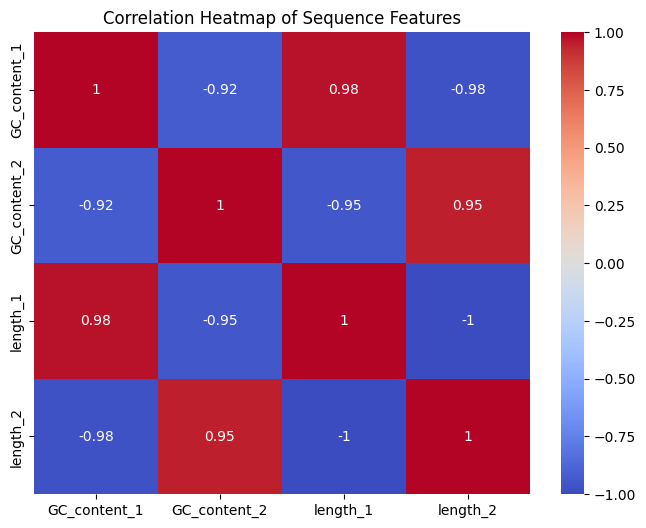

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the heatmap
heatmap_data = df[['GC_content_1', 'GC_content_2', 'length_1', 'length_2']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Sequence Features')
plt.show()

Thanks for staying tuned. :)